In [1]:
import numpy as np

import matplotlib.pyplot as plt
from cycler import cycler
from coffea import util
from coffea.processor import accumulate
import hist
import hist.intervals

from ttgamma.utils.plotting import (
    RebinHist,
    SetRangeHist,
    GroupBy,
    DictToHist,
    plotWithRatio,
)

Load output files

Set up groupings of samples.
Order of dictionary is used for determining plotting order

In [2]:
from save_to_root import outputMC, outputData

groupingCategory = {
    "NonPrompt": [3j, 4j],
    "MisID": [2j],
    "Prompt": [1j],
}

groupingFineCategory = {
    "Genuine Photon": [1j],
    "Misidentified Electron": [2j],
    "Hadronic Photon": [3j],
    "Hadronic Fake": [4j],
}

groupingMCDatasets = {
    "ZG": [
        "ZGamma_01J_5f_lowMass",
    ],
    "WG": [
        "WGamma",
    ],
    "other": [
        "TTbarPowheg_Dilepton",
        "TTbarPowheg_Semilept",
        "TTbarPowheg_Hadronic",
        "W2jets",
        "W3jets",
        "W4jets",
        "DYjetsM50",
        "ST_s_channel",
        "ST_tW_channel",
        "ST_tbarW_channel",
        "ST_tbar_channel",
        "ST_t_channel",
        "TTWtoLNu",
        "TTWtoQQ",
        "TTZtoLL",
        "GJets_HT200To400",
        "GJets_HT400To600",
        "GJets_HT600ToInf",
        "ZZ",
        "WZ",
        "WW",
        "TGJets",
    ],
    "ttgamma": [
        "TTGamma_Dilepton",
        "TTGamma_SingleLept",
        "TTGamma_Hadronic",
    ],
}

In [3]:
# Group MC histograms
outputMC = {
    process: accumulate(outputMC[ds] for ds in datasets)
    for process, datasets in groupingMCDatasets.items()
}


def getHisto(name):
    return DictToHist(
        {process: histos[name] for process, histos in outputMC.items()}, name="dataset"
    )


# Group data histograms
outputDataHist = accumulate([histo for key, histo in outputData.items()])

/usr/local/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


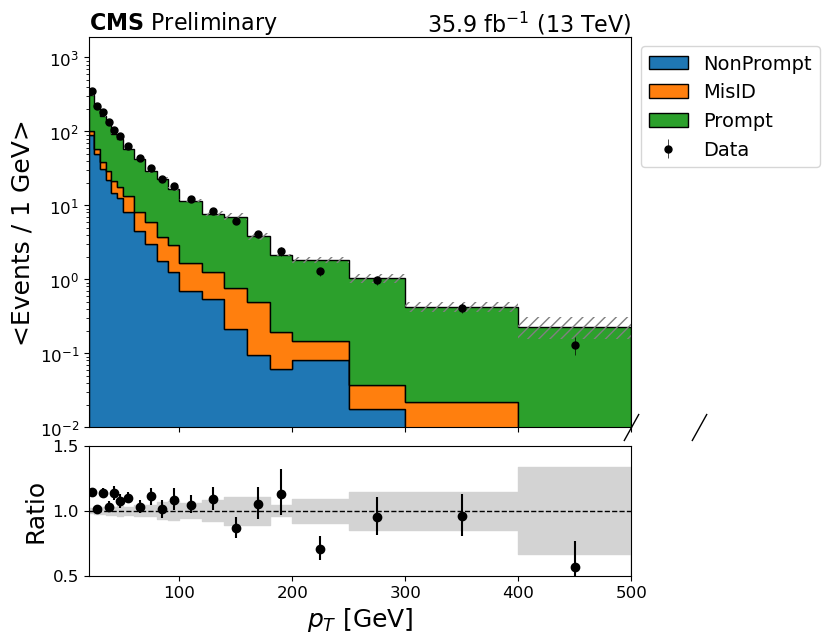

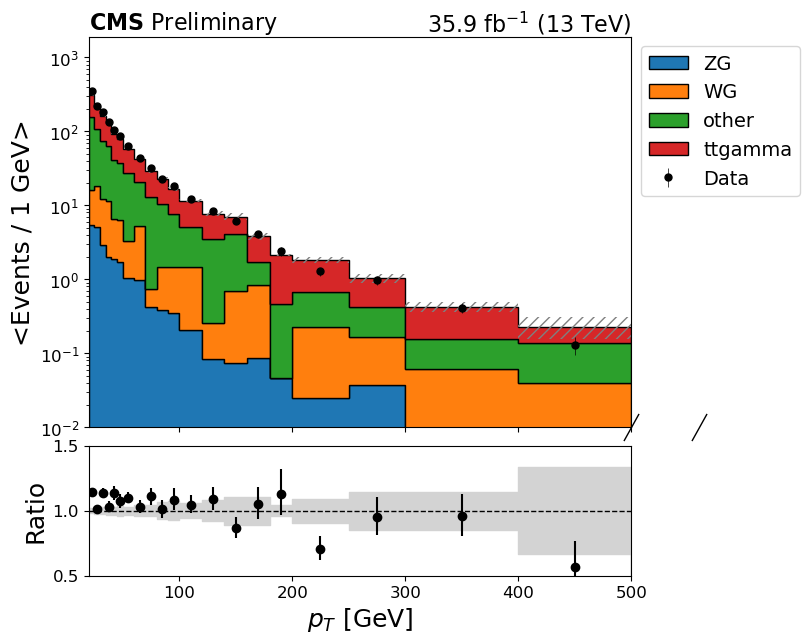

In [4]:
# Get photon pt distribution from coffea output
# sum over lepton flavors (get both electron and muon)
h = getHisto("photon_pt")[{"lepFlavor": sum}]

# integrate over systematics, selecting only "nominal"
h = h[{"systematic": "nominal"}]
# group the photon category axis into the category types listed above
h = GroupBy(h, "category", "category", groupingCategory)
# rebin the pt axis
new_bins = np.array(
    [
        20,
        25,
        30,
        35,
        40,
        45,
        50,
        60,
        70,
        80,
        90,
        100,
        120,
        140,
        160,
        180,
        200,
        250,
        300,
        400,
        500,
    ]
)
pt_axis = hist.axis.Variable(new_bins, name="pt", label=r"$p_{T}$ [GeV]")
h = RebinHist(h, pt=pt_axis)

hData = outputDataHist["photon_pt"][
    {"lepFlavor": sum, "systematic": sum, "category": sum}
]
hData = RebinHist(hData, pt=pt_axis)

plotWithRatio(
    h[{"dataset": sum}],
    hData,
    overlay="category",
    xRange=[20, 500],
    yRange=[0.01, None],
    logY=True,
    leg="right",
    binwnorm=1,
)
plotWithRatio(
    h[{"category": sum}],
    hData,
    overlay="dataset",
    xRange=[20, 500],
    yRange=[0.01, None],
    logY=True,
    leg="right",
    binwnorm=1,
)

In [ ]:
# Can you draw similar plots for the photon eta?

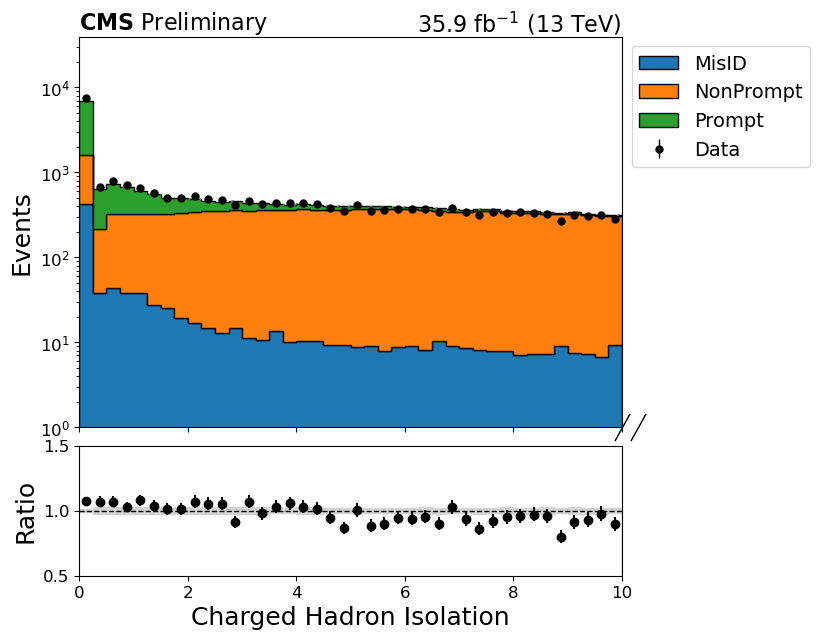

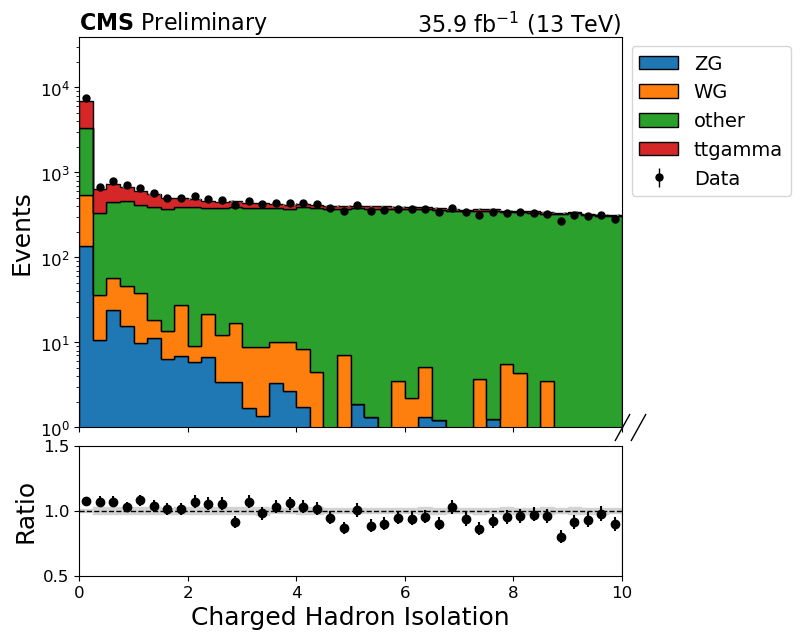

In [5]:
h = getHisto("photon_chIso")[{"lepFlavor": sum, "systematic": "nominal"}]
h = GroupBy(h, "category", "category", groupingCategory)

s = hist.tag.Slicer()
h = h[{"chIso": s[:: hist.rebin(5)]}]

hData = outputDataHist["photon_chIso"]
hData = hData[{"lepFlavor": sum, "systematic": sum, "category": sum}]
hData = hData[{"chIso": s[:: hist.rebin(5)]}]

plotWithRatio(
    h[{"dataset": sum}].sort("category"),
    hData,
    overlay="category",
    xRange=[0, 10],
    logY=True,
    leg="right",
)
plotWithRatio(
    h[{"category": sum}],
    hData,
    overlay="dataset",
    xRange=[0, 10],
    logY=True,
    leg="right",
)

/usr/local/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


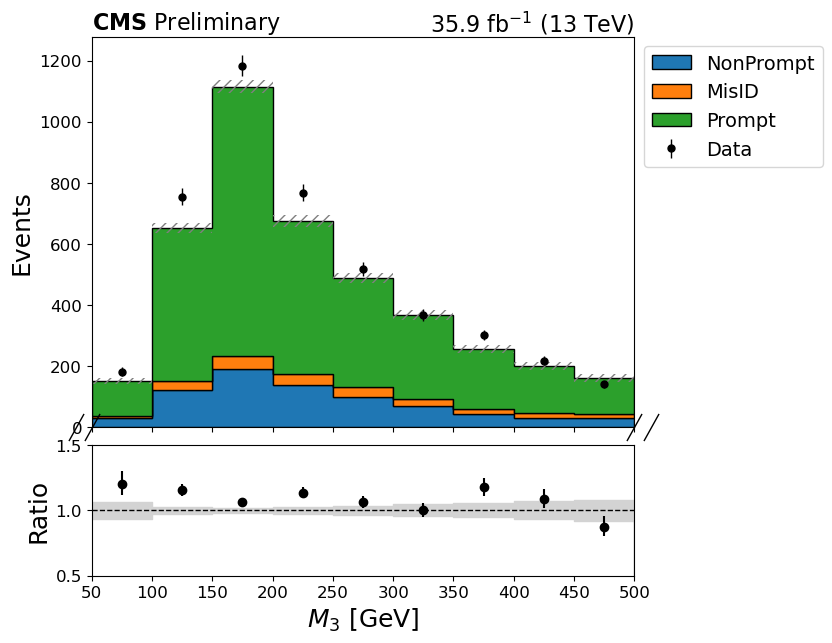

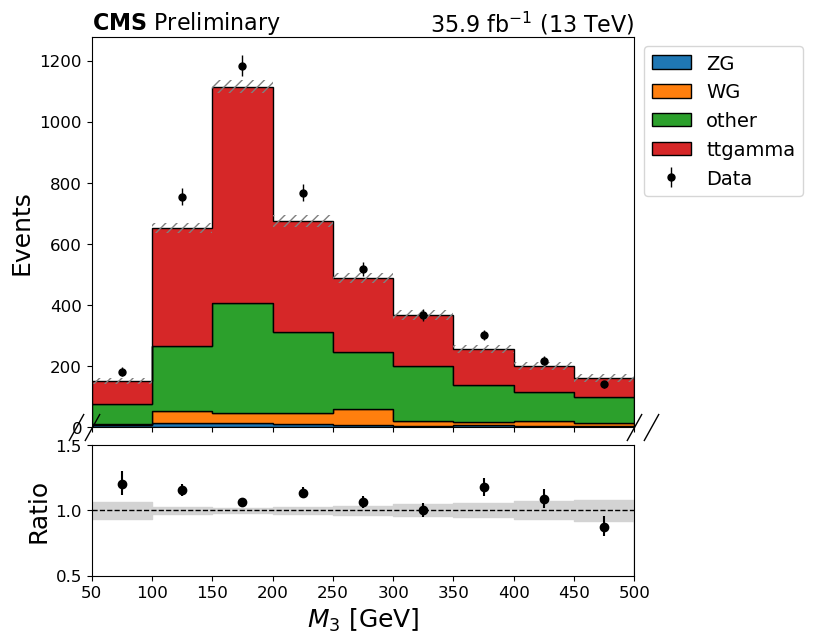

In [6]:
h = getHisto("M3")[{"lepFlavor": "muon", "systematic": "nominal"}]
h = GroupBy(h, "category", "category", groupingCategory)

s = hist.tag.Slicer()
h = h[{"M3": s[:: hist.rebin(4)]}]
h = SetRangeHist(h, "M3", 50, 500)

hData = outputDataHist["M3"][{"lepFlavor": "muon", "systematic": sum, "category": sum}]
hData = hData[{"M3": s[:: hist.rebin(4)]}]
hData = SetRangeHist(hData, "M3", 50, 500)

plotWithRatio(h[{"dataset": sum}], hData, overlay="category", leg="right")
plotWithRatio(h[{"category": sum}], hData, overlay="dataset", leg="right")

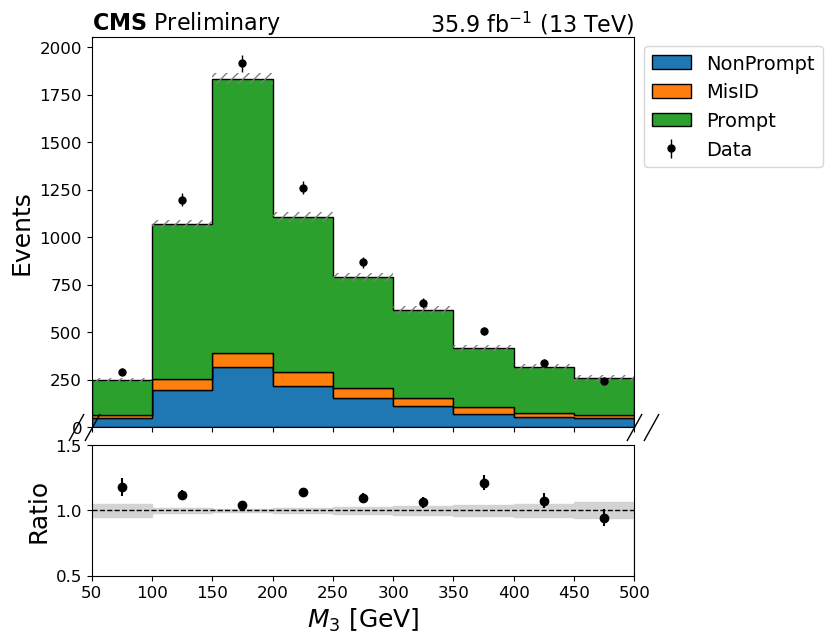

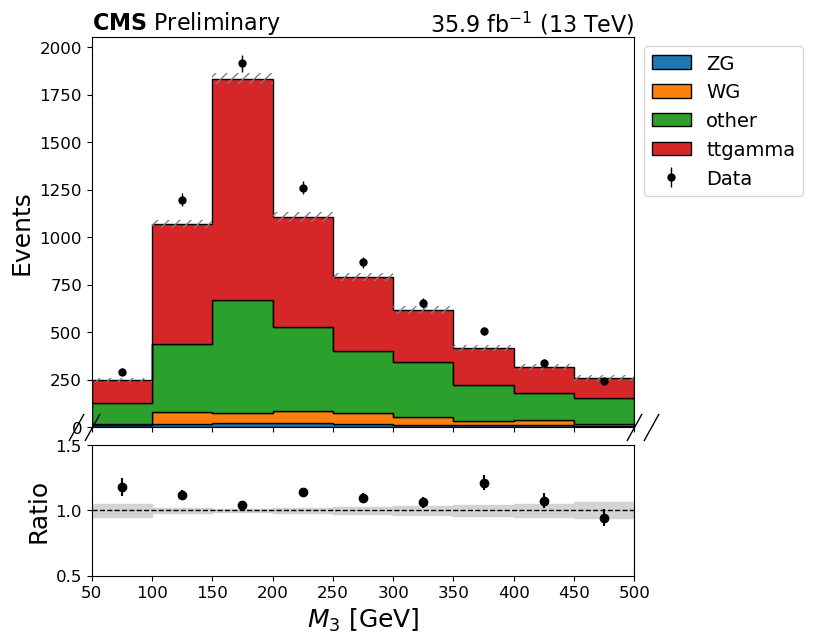

In [7]:
h = getHisto("M3")[{"lepFlavor": sum, "systematic": "nominal"}]
h = GroupBy(h, "category", "category", groupingCategory)

s = hist.tag.Slicer()
h = h[{"M3": s[:: hist.rebin(4)]}]
h = SetRangeHist(h, "M3", 50, 500)

hData = outputDataHist["M3"][{"lepFlavor": sum, "systematic": sum, "category": sum}]
hData = hData[{"M3": s[:: hist.rebin(4)]}]
hData = SetRangeHist(hData, "M3", 50, 500)

plotWithRatio(h[{"dataset": sum}], hData, overlay="category", leg="right")
plotWithRatio(h[{"category": sum}], hData, overlay="dataset", leg="right")

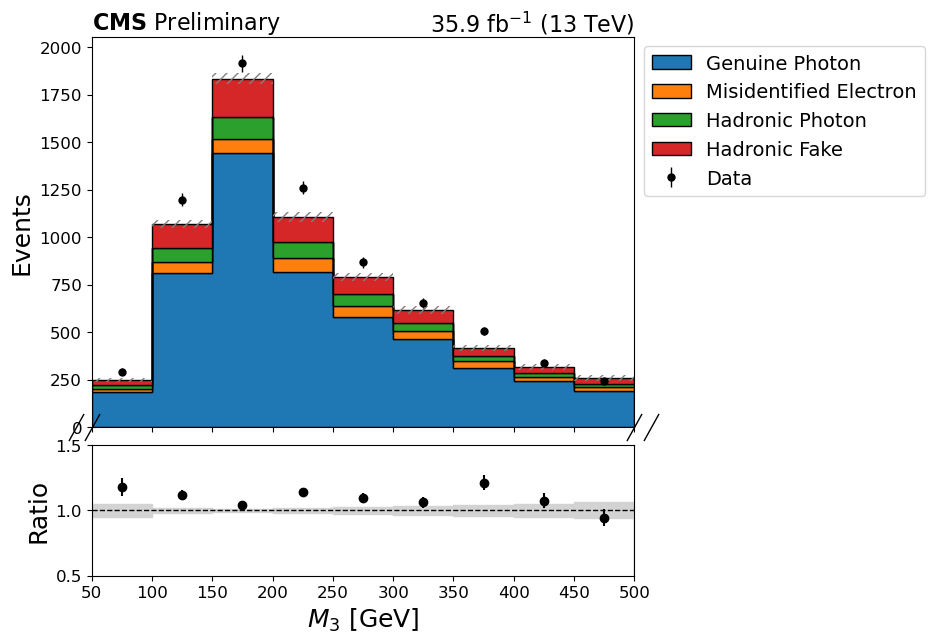

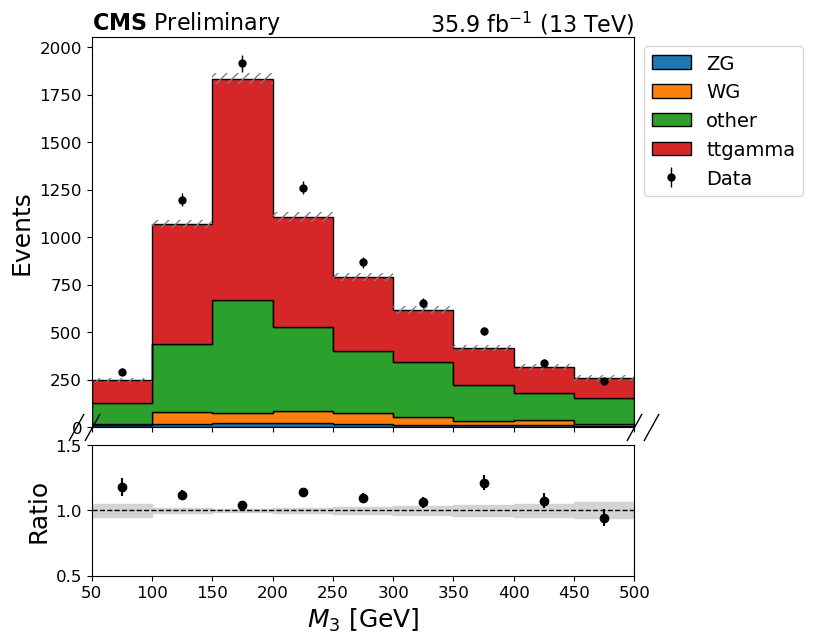

In [8]:
h = getHisto("M3")[{"lepFlavor": sum, "systematic": "nominal"}]
h = GroupBy(h, "category", "category", groupingFineCategory)

s = hist.tag.Slicer()
h = h[{"M3": s[:: hist.rebin(4)]}]
h = SetRangeHist(h, "M3", 50, 500)

hData = outputDataHist["M3"][{"lepFlavor": sum, "systematic": sum, "category": sum}]
hData = hData[{"M3": s[:: hist.rebin(4)]}]
hData = SetRangeHist(hData, "M3", 50, 500)

plotWithRatio(h[{"dataset": sum}], hData, overlay="category", leg="right")
plotWithRatio(h[{"category": sum}], hData, overlay="dataset", leg="right")

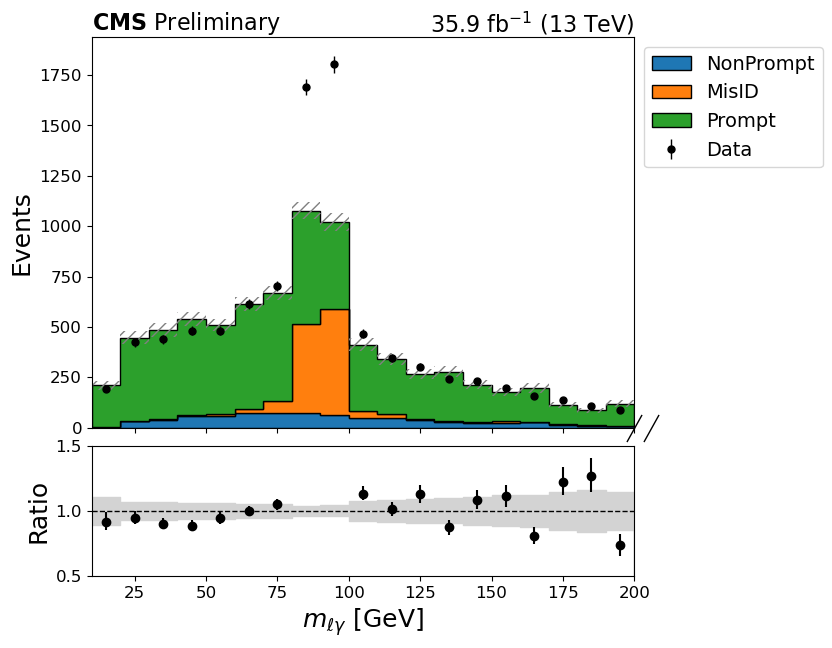

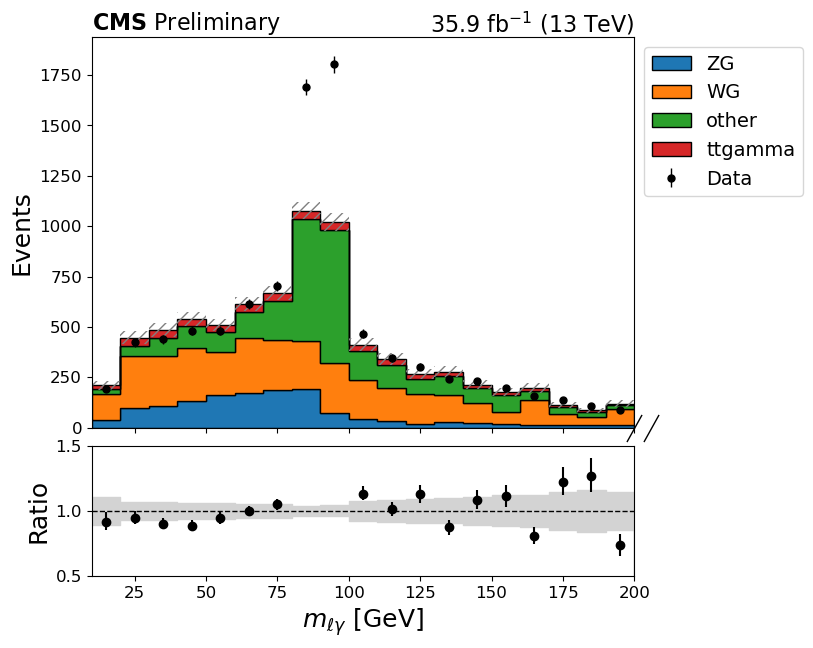

In [9]:
h = getHisto("photon_lepton_mass_3j0t")[
    {"lepFlavor": "electron", "systematic": "nominal"}
]
h = GroupBy(h, "category", "category", groupingCategory)

s = hist.tag.Slicer()
h = h[{"mass": s[:: hist.rebin(10)]}]
h = SetRangeHist(h, "mass", 10, 200)

hData = outputDataHist["photon_lepton_mass_3j0t"][
    {"lepFlavor": "electron", "systematic": sum, "category": sum}
]
hData = hData[{"mass": s[:: hist.rebin(10)]}]
hData = SetRangeHist(hData, "mass", 10, 200)

plotWithRatio(h[{"dataset": sum}], hData, overlay="category", leg="right")
plotWithRatio(h[{"category": sum}], hData, overlay="dataset", leg="right")